# Assignment 4

This assignment covers material on numerical integration. The assignment is due on by 7pm on Friday the 6th of March.

The breakdown of the marks is as follows:

Question 0 - [1 mark]  
Question 1 - [4 marks]  
Questino 2 - [5 marks]  
Question 3 - [5 marks]  
Question 4 - [5 marks]  
Question 5 - [5 marks]  
Question 6 - [5 marks]  

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1

In this question you will be asked to evaluate definite integrals in the form:

$$ \int_a^b f(x)\, dx$$ 

using Simpson's rule. You can copy code from the [examples repository](https://github.com/nielsw2/ACM20030-Examples) if you wish, but if you do remove all the plotting functionality. Do not use SciPy or any other library to evaluate the integrals, unless explicitly asked to do so.

In [51]:
def LagrangePoly(x, data):
    n = data.shape[0] - 1
    i = 1
    fn = 0
    while i <= n + 1:
        j = 1
        Li = 1
        while j <= n+1:
            if(j == i):
                j += 1
                continue
            Li *= (x - data[j-1,0])/(data[i-1,0] - data[j-1,0])
            j += 1
        fn += data[i-1,1]*Li
        i += 1
    return fn


def Simpson(f, a, b, N, plotMethod=True):
    dx = (b-a)/N
    xi = a
    area = 0
    i = 0
        
    while i < N:
        if(plotMethod):
            x1 = xi
            x2 = x1 + dx
            x3 = (x1+x2)/2 
            
            f1 = f(x1)
            f2 = f(x2)
            f3 = f(x3)

            LagrangePoly
            x = np.linspace(x1, x2, 100)
            y = LagrangePoly(x, np.array([[x1, f1], [x2, f2], [x3, f3]]))
            plt.plot(x,y , color='red')
            plt.vlines(xi, 0, f1 , color= 'red')
            #x = np.linspace(x1, x2, 100)
            #y = f(x)
            #plt.plot(x, y, color='red')
            #plt.vlines(xi, 0, f1 , color= 'red')
        
        # The below line applies Simpson's rule
        area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        xi += dx
        i += 1

        
    if(plotMethod):
        plt.vlines(b, 0, f(b) , color= 'red')
        x = np.linspace(a,b,100)
        y = f(x)
        plt.plot(x,y)
        plt.xlabel('x')
        plt.ylabel('f(x)');
    return area

## Q1 a

Evaluate $$ \frac{1}{\sqrt{\pi}}\int^{10}_{-10} e^{-x^2}\, dx$$

Use enough strips so that the result is accurate to a relative error of of at least 1e-6. Hint: to within machine precision the above integral evaluates to  1 .

area of f = 0.999966


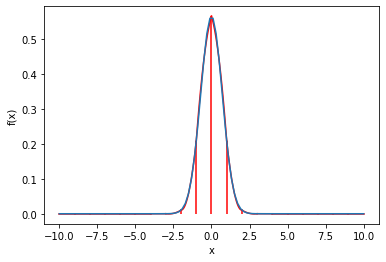

In [57]:
def f(x):
    return (np.exp(-x**2))/np.sqrt(np.pi)

Simpsonf = Simpson(f, -10, 10, 20, True)
print('area of f = ''%.6f' % Simpsonf)

## Q1 b

Evaluate

$$\int^{50}_{-50} \frac{1}{\cosh x}\,dx $$

Use enough strips so that the result is accurate to a relative error of at least `1e-6`. Hint: to within machine precision the above integral evaluates to $\pi$.

area of g = 3.065445


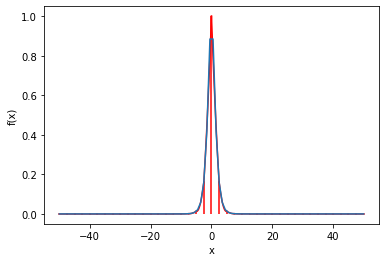

In [56]:
def g(x):
    return 1/(np.cosh(x))

Simpsong = Simpson(g, -50, 50, 40, True)
print('area of g = ''%.6f' % Simpsong)

## Q1 c

Use SciPy's `integrate.quad()` function to evaluate the integrals in Q1a and Q1b

In [38]:
from scipy.integrate import quad 
If = quad(f, -10, 10)
Ig = quad(g, -50, 50)
print('f area = ', If)
print('g area = ', Ig)

f area =  (0.9999999999999999, 2.085612812503633e-13)
g area =  (3.141592653589793, 5.5381858831212136e-11)


# Question 2 - improper integrals

In the lectures we looked at numerically evaluating indefinite integrals of the form

$$ \int^b_a f(x)\, dx$$ where $a,b$ are finite. What about improper integrals where either $a$, $b$ or both are infinite? The methods we know so far cannot immediately be applied to these cases.

One method is to transform the integral using the result

$$ \int_a^b f(x)\, dx = \int^{1/a}_{1/b} t^{-2} f(t^{-1})\, dt$$

which holds so long as $a,b>0$.

## Q2 a

Using the above result numerically evaluate the following integral

$$ \int^\infty_1 \frac{\log(x)}{x^3}\,dx $$

using Simpson's rule. Use 100 strips to evaluate the integral.

Hint: you will have to use an `if` statement inside your transformed function for to deal with $t=0$. For this case it is useful to note that $\lim_{t\rightarrow0} t \log(1/t) = 0$.

In [59]:
def h(x):
    if x==0:
        return 0
    else:
        return x*(np.log(1/x))


Simpsonh = Simpson(h, 0, 1, 100, False)
print('area of h = ', Simpsonh)

area of h =  0.2499980745946372


## Q2 b

Numerically evaluate

$$ \int^\infty_0 \frac{1}{(x+1)^3}\,dx$$

using Simpson's rule.

Hint: break the integral into two integrals, one with a finite domain and one with an infinite domain. In each domain use 100 strips to evalute the integral. Check your answer against the analytic result.

In [97]:
def j(x):
    return x/((1+x)**3)

def jl(x):
    return 1/((1+x)**3)

Simpsonj1 = Simpson(j, 0, 100, 100, False) #Finite domain
Simpsonj2 = Simpson(jl, 0, 0.01, 100, False) #Infinite domain
print('area of j1 = ', Simpsonj1)
print('area of j2 = ', Simpsonj2)

Simpsonj = Simpsonj1 + Simpsonj2
print('area of j = ', Simpsonj)

#Finite domain used is 0 to 100
#Infinite domain used was 100 to infinity, using the improper integral fix
#This gave close to the correct answer considering the small number of iterations

area of j1 =  0.48470966488391115
area of j2 =  0.009851975296539554
area of j =  0.4945616401804507


# Question 3 - Boole's rule

Fitting the integrand to a quintic polynomial results in Boole's rule for integration. In the lecture the formula for Boole's rule was given as

$$ \int^b_a f(x)\,dx \simeq \frac{2 \Delta x}{45}\left(7f_0 + 32 f_1 + 12 f_2 +32f_3 + 7 f_4\right) $$

where $\Delta x = (b-a)/4$, and $f_i = f(a + i\Delta x)$.

## Q3 a

Write a function that numerically integrates another function using Boole's rule. Use the following function definition:

In [112]:
def BooleIntegration(f, a, b, N):
    area = 0
    xi = a
    dx = (b-a)/4
    i = 0
    while i < N:
        x0 = xi
        x1 = xi + 1*dx
        x2 = xi + 2*dx
        x3 = xi + 3*dx 
        x4 = xi + 4*dx
        
        f0 = f(x0)
        f1 = f(x1)
        f2 = f(x2)
        f3 = f(x3)
        f4 = f(x4)
        
        area = (2*dx/45)*(7*f0 + 32*f1 +12*f2 +32*f3 +7*f4)
        
        i += 1
    
    return area

Test your function by evaluating the following using 100 strips.

$$ \int_0^\pi \sin(x)\,dx $$

In [113]:
def k(x):
    return np.sin(x)

BooleIntegrationk = BooleIntegration(k, 0, np.pi, 100)
print('Boole Integration for k = ', BooleIntegrationk)

Boole Integration for k =  1.9985707318238357


## Q3 b

For Boole's rule show that the global error scales as $\Delta x^6$. The below plot shows a $\Delta x^6$ reference line.

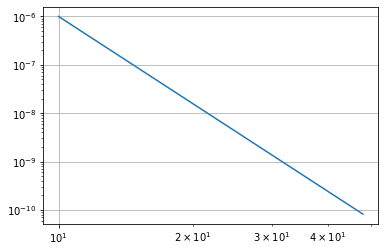

In [116]:
x = np.linspace(10,48,100)
y = x**-6

plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.plot(x,y);
#*****************************#

# Question 4 - integrand with a singularity

The techniques developed in the lecture require the integrand to be continuous and bounded. What happens if there is a singularity in the integrand? In general these can be difficult to deal with (though some more generic methods exist - see, e.g., [Tanh-sinh quadrature](https://en.wikipedia.org/wiki/Tanh-sinh_quadrature)).

In this example we will look at an explicit example that can be dealt with by a change of variables. Consider the identity:

$$ \int_0^1 \frac{f(x)}{x^\alpha}\, dx = \frac{1}{\alpha} \int_0^1 f(t^{1/\alpha}) t^{(1-2\alpha)/\alpha}\,dt$$

which is achived by changing variables using $t = x^\alpha$. This identity holds when $0 < \alpha < 1$ and $f(x)$ is continous on $[0,1]$.

Let
$$I = \int^1_0 \frac{\cos(10x)}{x^{1/2}}\,dx $$

Plot the integrand in the range $[0,1]$, use a grid and label your axes.

Area of k =  (19.375791742244, 4.67528018657025)


C:\Users\macla\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.


Text(0, 0.5, 'k(x)')

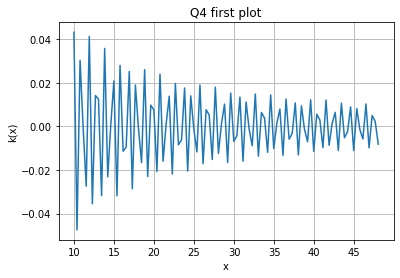

In [131]:
def k(x):
    return (np.cos(10*x))/x**1/2

Ik = quad(k, 0, 1)
print('Area of k = ', Ik)

plt.plot(x,k(x))
plt.grid(True)
plt.title('Q4 first plot')
plt.xlabel('x')
plt.ylabel('k(x)')

Define and plot the transformed integrand. For the plot use a grid and label your axes.

Area of l =  (0.3463662323844363, 3.1870325678965594e-14)


Text(0, 0.5, 'l(x)')

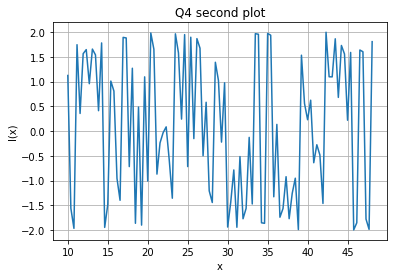

In [132]:
def l(x):
    return 2*np.cos(10*x**2)

Ik = quad(l, 0, 1)
print('Area of l = ', Ik)

plt.plot(x,l(x))
plt.grid(True)
plt.title('Q4 second plot')
plt.xlabel('x')
plt.ylabel('l(x)')

Numerically evaluate $I$ using Simpson's rule. Use 100 strips to do this.

In [134]:
Simpsonk = Simpson(k, 0, 1, 100, False)
Simpsonl = Simpson(l, 0, 1, 100, False)

print('area of k =', Simpsonk)
print('area of l =', Simpsonl)

area of k = inf
area of l = 0.34636620914645183


C:\Users\macla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


# Question 5

Write your own function to integrate the following data using Simpson's rule.

In [268]:
x = np.linspace(0, np.pi, 101)
dx = x[1]-x[0]
y = np.sin(x)

In [7]:
def SimpsonsIntegrateData(data, dx):
    area = 0
    # Write your code here
    
    
    return area

Integrate the data using your function

Recall that Simpson's method needs an odd number of data points to work. If you use an even number you will get a bad result. If you check the convergence rate in this case you will see it is not what is expected. Checking the convergence rate is an important test of an integration code.

# Question 6

Evaluate the following integral using both Simpsons rule and an RK4 ODE method

$$ \int_0^5 \sinh(x) (x-5)\, dx $$

Compare the results of the two methods and take sufficient strips/small enough step sizes to ensure the results agree to a relative accuracy of 1e-6.